In [1]:
import numpy as np
import sys
import glob
import pickle
import pandas as pd
import pyccl as ccl
import astropy.units as u
from astropy.coordinates import SkyCoord
from mpl_toolkits import axes_grid1
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2
sys.path.append('/pbs/throng/lsst/users/cpayerne/ClusterLikelihoods/modules/')
import abundance as cl_count
import covariance as covar
import edit
def binning(corner): return [[corner[i],corner[i+1]] for i in range(len(corner)-1)]

In [3]:
def load(filename, **kwargs):
    with open(filename, 'rb') as fin:
        return pickle.load(fin, **kwargs)

## Fiducial cosmology (CCL)

In [415]:
Omega_c_true = 0.30711 - 0.048254
Omega_b_true = 0.048254
sigma8_true = .8288
Omegam_true = 0.30711
True_value = [Omega_c_true + Omega_b_true, sigma8_true]
cosmo = ccl.Cosmology(Omega_c = Omega_c_true, Omega_b = Omega_b_true, h = 0.6777, sigma8 = sigma8_true, n_s=0.96)

In [416]:
where_cat = '/sps/lsst/users/cpayerne/1000xsimulations/1000_simulations/afumagalli/catalogs/plc_14/*'

In [417]:
file=glob.glob(where_cat)[1]

In [418]:
dat = pd.read_csv(file ,sep=' ',skiprows=12, names=['M','z','dec','ra'])

In [419]:
pos_ra, pos_dec = dat['ra'], dat['dec']

In [420]:
ra_center, dec_center = 180, 60

In [421]:
cat_pinocchio = SkyCoord(ra=np.array(pos_ra)*u.degree, dec=np.array(pos_dec)*u.degree)

In [422]:
cat_center =SkyCoord(ra=np.array([ra_center])*u.degree, dec=np.array([dec_center])*u.degree)

In [423]:
f_sky = (1/4)/10

In [424]:
r_aperture = np.arccos(1-2*f_sky)*180/np.pi

In [425]:
r_aperture

18.194872338766785

In [426]:
idxcat_center, idxcat_pinocchio, d2d, d3d = cat_center.search_around_sky(cat_pinocchio, r_aperture*u.deg)

In [429]:
dat=dat[idxcat_center]

KeyError: "None of [Int64Index([    17,     38,     58,     61,     75,     79,     83,    103,\n               116,    121,\n            ...\n            129910, 129918, 129921, 129930, 129949, 129961, 129970, 129988,\n            129994, 130036],\n           dtype='int64', length=12785)] are in the [columns]"

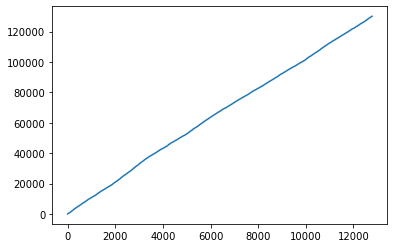

In [428]:
plt.plot(idxcat_center)

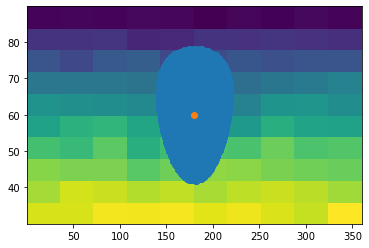

In [405]:
plt.hist2d(np.array(dat['ra']), np.array(dat['dec']))
plt.scatter(np.array(dat['ra'][idxcat_center]-ra_shift), np.array(dat['dec'][idxcat_center]))
plt.scatter(ra_center, dec_center)

In [406]:
ra_shift=0
eq = SkyCoord(pos_ra-ra_shift, pos_dec, unit=u.deg)
gal = eq.galactic

In [407]:
eq_cut = SkyCoord(np.array(dat['ra'][idxcat_center]-ra_shift), np.array(dat['dec'][idxcat_center]), unit=u.deg)
gal_cut = eq_cut.galactic

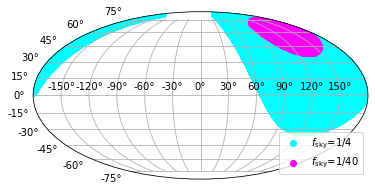

In [414]:
plt.subplot(111, projection='mollweide')
plt.grid(True)
shift=1
plt.scatter(gal.l.wrap_at('180d').radian, gal.b.radian,label=r'$f_{\rm sky}$=1/4', c='cyan')
plt.scatter(gal_cut.l.wrap_at('180d').radian, gal_cut.b.radian, label=r'$f_{\rm sky}$=1/40', c='magenta')
plt.legend(loc='lower right')
plt.savefig('map.png', bbox_inches='tight', dpi=300)

In [409]:
ra_cut, dec_cut = np.array(dat['ra'][idxcat_center]), np.array(dat['dec'][idxcat_center])

In [410]:
ra_cut_radians, dec_cut_radians = ra_cut*np.pi/180, dec_cut*np.pi/180

In [411]:
(len(ra_cut)/len(dat['ra']))**(-1)

10.17121626906531